1. age
2. sex
3. cp: chest pain type (4 values)
    - Value 0: typical angina
    - Value 1: atypical angina
    - Value 2: non-angina pain
    - Value 3: asymptomatic
4. trestbps: resting blood pressure(in mm Hg on admission to the hospital
5. chol: serum cholestoral in mg/dl
6. fbs: fasting blood sugar > 120 mg/dl(1=true; 0=false)
7. restecg: resting electrocardiographic results (values 0,1,2)
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T-wave inversions and/or ST elevation or depression of>0.05 mV)
    - Value 2: Showing probable or definite left ventricular hypertrophy by Estes criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina
10. oldpeak: oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    - value 1: upsloping
    - value 2: flat
    - value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. target: 0=less chance of heart attack, 1= more chance of heart attack
- The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

1. Importing the Libraries
2. Importing the Dataset
3. Taking Care of Missing Values
4. Taking Care of Duplicate Values
5. Data Processing
6. Encoding Categorical Data
7. Feature Scaling
8. Splitting The Dataset Into The Training Set And Test Set
9. Logistic Regression
10. SVC
11. KNeighbors Classifier

#### Non-Linear ML Algorithms
12. Decision Tree Classifier
13. Random Forest Classifier
14. Gradient Boosting Classifier
15. Prediction on New Data
16. Save Model Usign Joblib
17. Creating GUI

# Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
heart = pd.read_csv('heart (1).csv')

In [3]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Handling Missing Values

In [4]:
heart.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

# Handling Duplicate Values

In [5]:
heart.duplicated().any()

True

In [6]:
heart = heart.drop_duplicates()

In [7]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


# Encoding Categorical Data

In [8]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Separating categorical data columns from continuous data columns

In [9]:
# Assuming the columns with less than or equal to 5 as categorical columns

cont_cols = []
cat_cols = []

for cols in heart.columns:
    if heart[cols].nunique() <= 5:
        cat_cols.append(cols)
    else:
        cont_cols.append(cols)

In [10]:
#continuous data columns
cont_cols

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [11]:
#categorical data columns
cat_cols

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [12]:
# removing categorical columns already having  values as 0 and 1.

In [13]:
cat_cols.remove('sex')

In [14]:
cat_cols.remove('fbs')

In [15]:
cat_cols.remove('exang')

In [16]:
cat_cols.remove('target')

In [17]:
# categorical encoding for the rest of the columns having more than 2 categories in cat_cols.

In [18]:
# categorical encoding using .get_dummies.

df = pd.get_dummies(heart, columns = cat_cols, drop_first = True)
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,...,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0,...,0,0,0,0,0,0,0,0,0,1
3,61,1,148,203,0,161,0,0.0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,1,106,0,1.9,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,120,211,0,115,0,1.5,1,0,...,0,1,0,0,0,0,0,0,1,0
733,44,0,108,141,0,175,0,0.6,1,0,...,0,1,0,0,0,0,0,0,1,0
739,52,1,128,255,0,161,1,0.0,0,0,...,0,0,1,1,0,0,0,0,0,1
843,59,1,160,273,0,125,0,0.0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [19]:
# Feature Scaling for continuous data columns

from sklearn.preprocessing import StandardScaler

In [20]:
st = StandardScaler()
df[cont_cols] = st.fit_transform(heart[cont_cols])

In [21]:
pd.set_option('display.max_columns', None) # display all the columns in dataframe
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0,0.806035,0,-0.037124,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,1,0.237495,1,1.773958,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,0,-1.074521,1,1.342748,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0,0.499898,0,-0.899544,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,1,-1.905464,0,0.739054,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,0,-0.661712,-0.687083,0,-1.511859,0,0.394086,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
733,-1.153610,0,-1.346085,-2.041893,0,1.112172,0,-0.382092,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0
739,-0.267966,1,-0.205463,0.164513,0,0.499898,1,-0.899544,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1
843,0.506972,1,1.619532,0.512893,0,-1.074521,0,-0.899544,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


# Supervised learning (Classification Problem)

### Separating independent variables from the target/label/dependent variable

In [22]:
df.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'target', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1',
       'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1', 'thal_2',
       'thal_3'],
      dtype='object')

In [23]:
X = df.drop(columns = 'target')

In [24]:
pd.set_option('display.max_columns', None)
X

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0,0.806035,0,-0.037124,0,0,0,1,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,1,0.237495,1,1.773958,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,0,-1.074521,1,1.342748,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0,0.499898,0,-0.899544,0,0,0,1,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,1,-1.905464,0,0.739054,0,0,0,1,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,0,-0.661712,-0.687083,0,-1.511859,0,0.394086,0,1,0,0,0,1,0,0,0,0,0,0,1,0
733,-1.153610,0,-1.346085,-2.041893,0,1.112172,0,-0.382092,0,1,0,1,0,1,0,0,0,0,0,0,1,0
739,-0.267966,1,-0.205463,0.164513,0,0.499898,1,-0.899544,0,0,0,1,0,0,1,1,0,0,0,0,0,1
843,0.506972,1,1.619532,0.512893,0,-1.074521,0,-0.899544,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [25]:
y = df['target']

In [26]:
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

### Train_Test_Split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [29]:
X_train

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
151,-0.046555,1,3.444528,0.706437,0,1.986850,0,-0.899544,1,0,0,0,0,0,1,1,0,0,0,0,0,1
78,-0.267966,1,0.136724,-0.880627,0,0.368697,0,-0.209608,1,0,0,1,0,0,1,1,0,0,0,0,1,0
16,-0.378671,0,0.478910,1.190298,0,-0.331045,0,0.394086,0,1,0,0,0,0,1,1,0,0,0,0,1,0
10,1.835438,0,-1.117961,-1.887058,0,-1.074521,0,0.480328,0,0,0,1,0,1,0,0,0,0,0,0,1,0
215,-0.600082,1,-0.091401,0.377412,0,0.937237,0,-0.382092,1,0,0,1,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1.392616,1,-0.661712,-0.183867,0,-3.436149,0,-0.037124,0,0,0,1,0,1,0,0,0,0,0,0,1,0
77,0.949794,1,0.478910,-1.151589,0,-0.243577,1,2.550136,0,0,0,0,0,0,1,0,1,0,0,0,0,1
125,0.617678,0,1.049221,-0.125804,0,0.937237,0,-0.123366,0,0,1,1,0,0,1,0,0,0,0,0,1,0
522,1.392616,0,1.163283,0.590310,0,0.980971,0,-0.899544,0,1,0,1,0,0,1,1,0,0,0,0,1,0


In [30]:
X_test

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
245,-1.153610,1,-0.091401,-0.532247,0,1.680713,0,-0.899544,1,0,0,0,0,0,1,0,0,0,0,0,1,0
349,0.839089,0,-0.091401,0.319348,0,-2.299069,0,0.135360,0,1,0,1,0,1,0,1,0,0,0,0,0,1
135,0.396267,0,2.189843,-0.416120,1,-0.156110,1,1.515232,0,0,0,0,0,1,0,0,1,0,0,1,0,0
389,0.949794,1,0.764066,-0.261285,1,0.018826,0,1.084022,0,0,1,0,0,0,0,0,0,0,0,1,0,0
66,-0.157260,1,-0.091401,-0.958045,1,0.106294,0,0.135360,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,-1.375021,0,-1.688272,0.358057,0,-1.205722,0,-0.382092,0,0,0,0,0,1,0,0,0,0,0,0,1,0
20,0.617678,1,0.478910,-1.190298,0,0.237495,0,1.687716,0,1,0,0,0,1,0,0,0,0,0,0,1,0
177,1.060500,1,-0.661712,-0.009677,0,-2.342803,1,0.997780,0,0,0,0,0,0,0,1,0,0,0,0,1,0
90,-0.046555,0,-1.346085,0.396766,0,0.762302,0,-0.899544,0,1,0,0,0,0,1,0,0,0,0,0,1,0


In [31]:
y_train

151    0
78     1
16     1
10     1
215    1
      ..
267    0
77     0
125    1
522    1
119    1
Name: target, Length: 211, dtype: int64

In [32]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
421    1
20     0
177    0
90     1
179    0
Name: target, Length: 91, dtype: int64

### Model Training 

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [34]:
# Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [35]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [36]:
knc = KNeighborsClassifier()
#knc.fit(X_train, y_train)

In [37]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

### Prediction on test data with the trained algorithms

In [40]:
lr_pred = lr.predict(X_test)
svc_pred = svc.predict(X_test)
#knc_pred = knc.predict(X_test)
dtc_pred = dtc.predict(X_test)
rfc_pred = rfc.predict(X_test)
gbc_pred = gbc.predict(X_test)

pred_df = pd.DataFrame({'Actual': y_test,
                       'LR': lr_pred,
                       'SVC': svc_pred,
                       #'KNC': knc_pred,
                       'DTC': dtc_pred,
                       'RFC': rfc_pred,
                       'GBC': gbc_pred})

In [41]:
pred_df

,Actual,LR,SVC,DTC,RFC,GBC
245,1,1,1,1,1,1
349,0,0,0,1,0,1
135,0,0,0,0,0,0
389,1,0,0,0,0,0
66,1,1,1,1,1,1
...,...,...,...,...,...,...
421,1,1,1,1,1,1
20,0,1,1,1,1,1
177,0,0,0,1,0,0
90,1,1,1,1,1,1


### Visual comparision of prediction made by trained algorithms with the actual test data

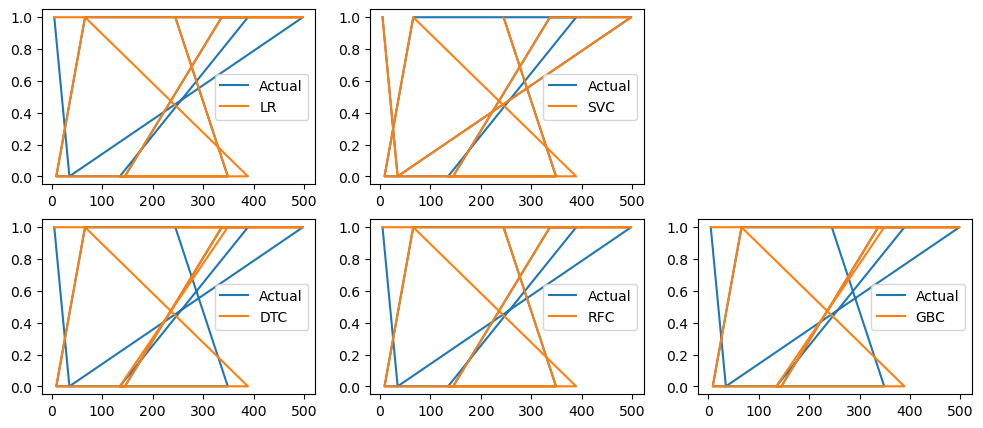

In [42]:
plt.figure(figsize = (12,5))

# plot for LogisticRegression
plt.subplot(231)
plt.plot(pred_df['Actual'].iloc[0:11], label = 'Actual')
plt.plot(pred_df['LR'].iloc[0:11], label = 'LR')
plt.legend()

# plot for SVC
plt.subplot(232)
plt.plot(pred_df['Actual'].iloc[0:11], label = 'Actual')
plt.plot(pred_df['SVC'].iloc[0:11], label = 'SVC')
plt.legend()

#plot for KNeighborsClassifier
#plt.subplot(233)
#plt.plot(pred_df['Actual'].iloc[0:11], label = 'Actual')
#plt.plot(pred_df['KNC'].iloc[0:11], label = 'KNC')
#plt.legend()

#plot for DecisionTreeClassifier
plt.subplot(234)
plt.plot(pred_df['Actual'].iloc[0:11], label = 'Actual')
plt.plot(pred_df['DTC'].iloc[0:11], label = 'DTC')
plt.legend()

#plot for RandomForestClassifier
plt.subplot(235)
plt.plot(pred_df['Actual'].iloc[0:11], label = 'Actual')
plt.plot(pred_df['RFC'].iloc[0:11], label = 'RFC')
plt.legend()

#plot for GradientBoostingClassifier
plt.subplot(236)
plt.plot(pred_df['Actual'].iloc[0:11], label = 'Actual')
plt.plot(pred_df['GBC'].iloc[0:11], label = 'GBC')
plt.legend()

### Algorithms Evaluation

In [43]:
from sklearn import metrics

In [54]:
score = []

for k in range(1, 40):
    knc = KNeighborsClassifier(n_neighbors = k)
    knc.fit(X_train, y_train)
    knc_pred = knc.predict(X_test)
    score.append(metrics.accuracy_score(y_test, knc_pred))

In [45]:
score

[0.6813186813186813,
 0.7912087912087912,
 0.7252747252747253,
 0.7802197802197802,
 0.7912087912087912,
 0.8021978021978022,
 0.7802197802197802,
 0.8021978021978022,
 0.8021978021978022,
 0.7802197802197802,
 0.7912087912087912,
 0.7802197802197802,
 0.7912087912087912,
 0.7912087912087912,
 0.7912087912087912,
 0.7912087912087912,
 0.7582417582417582,
 0.7802197802197802,
 0.7582417582417582,
 0.7802197802197802,
 0.7692307692307693,
 0.7692307692307693,
 0.7582417582417582,
 0.7802197802197802,
 0.7692307692307693,
 0.7802197802197802,
 0.7692307692307693,
 0.7912087912087912,
 0.7802197802197802,
 0.7912087912087912,
 0.7912087912087912,
 0.7912087912087912,
 0.7802197802197802,
 0.7912087912087912,
 0.7912087912087912,
 0.7912087912087912,
 0.7802197802197802,
 0.7802197802197802,
 0.7692307692307693]

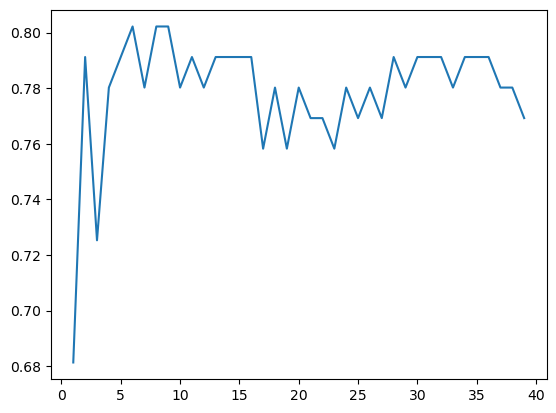

In [46]:
plt.plot(range(1, 40), score)

In [47]:
knc = KNeighborsClassifier(n_neighbors = 9)
knc.fit(X_train, y_train)
knc_pred = knc.predict(X_test)

In [48]:
#Accuracy Score

lr_as = metrics.accuracy_score(y_test, lr_pred)
svc_as = metrics.accuracy_score(y_test, svc_pred)
knc_as = metrics.accuracy_score(y_test, knc_pred)
dtc_as = metrics.accuracy_score(y_test, dtc_pred)
rfc_as = metrics.accuracy_score(y_test, rfc_pred)
gbc_as = metrics.accuracy_score(y_test, gbc_pred)

print(lr_as, svc_as, knc_as, dtc_as, rfc_as, gbc_as)

0.8461538461538461 0.8021978021978022 0.8021978021978022 0.7252747252747253 0.8021978021978022 0.8021978021978022


### Prediction on new customer data

In [49]:
X.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1', 'slope_2',
       'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [50]:
cus1 = {'age': 40, 'sex': 1, 'trestbps': 135, 'chol': 210, 'fbs': 0, 'thalach': 150, 'exang': 0, 'oldpeak': 2.5,
       'cp_1': 1, 'cp_2':0, 'cp_3':0, 'restecg_1':0, 'restecg_2': 0, 'slope_1':1, 'slope_2':0,
       'ca_1':0, 'ca_2':0, 'ca_3':1, 'ca_4':0, 'thal_1':1, 'thal_2':0, 'thal_3':0}

In [51]:
cust1_data = pd.DataFrame(cus1, index = [0])

In [52]:
cust1_data

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,40,1,135,210,0,150,0,2.5,1,0,0,0,0,1,0,0,0,1,0,1,0,0


In [53]:
lr.predict(cust1_data)

array([0], dtype=int64)